In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [48]:
df = pd.read_csv("data/diabetes.csv")
df = df[df["BMI"]>10]
df = df[df["BloodPressure"]>10]
dfD = df[df["Outcome"]==1]
dfN = df[df["Outcome"]==0]
dPos = dfD.BMI
dNeg = dfN.BMI
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
#Basics
print("Non-Diabetics mean and median", dNeg.mean(), dNeg.median())
print("Diabetics mean and median", dPos.mean(), dPos.median())

Non-Diabetics mean and median 30.95711297071125 30.4
Diabetics mean and median 35.35099601593622 34.3


# Hypothesis Testing

### Chance - Is the Difference in BMI Between Diabetics and Non-Diabetics Legit, or Due to Chance?

We can do some testing to see if this difference is real - the raw averages show a difference, but do we have enough data and enough of a difference to say that there is a real, tangible distinction? First, we can look at the distributions visually. 

<AxesSubplot:xlabel='BMI', ylabel='Density'>

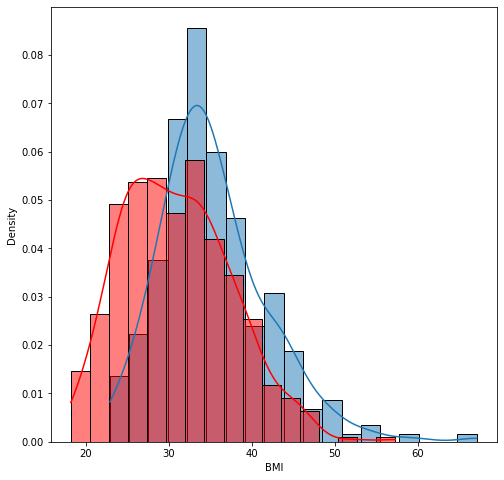

In [50]:
sns.histplot(dPos, kde=True, stat="density")
sns.histplot(dNeg, kde=True, stat="density", color='red')


### OK - Looks Kind of Different, What About Chance???

Hypothesis testing can allow us to test if differences look to be real, or are likely to be determined by chance. 

This is something called a hypothesis test, and is a classic (if problematic) statistical test. Our steps will be:
<ul>
<li>Define a test statistic - whatever we are examining.
<li>Define a null hypothesis - assumption that the effect is <b>not</b> real.
<li>Compute the p-value - the probability of the null hypothesis being true. 
<li>Determine if is statistically significant - is the p-value over/under some cutoff. 
</ul><br>
Overall, if we can determine that there is an extremely small probability that the null hypothesis is true (usually <.05), we can conclude that the impact we observered is legit. 
<br><br><br>
<h2>Testing - t's, z's, sides, and samples</h2>
There are a few varieties of hypothesis testing, and the labels often overlap and intersect:
<ul>
<li>Samples - a one sample test is to determine difference from some value. A two sample tests is comparing for a difference between two samples. 
<li>Sides - a one sided test only looks for if the test score is too high or too low. A two sided test looks for either too high or too low. 
<li>Z test - when we know the population variance. 
<li>T test - when we don't know the population variance. 
</ul>
<br><br>

<h4>Big important note - the book examples build calculations from scratch. To do they create custom classes and functions. I'm assuming that you all haven't covered this in detail in the programming class. It isn't super complex and is worth working through, but we won't do it now. Please walk through the examples in 9.1-9.4, and then 9.5-end and try to repeat and make sense of what they are coding. We'll walk though it in a week or so. Right now, we'll use library functions and simplified versions of the book stuff to do our tests.</h4>

### Define Test Statistic

First, we need a test statistic. For this one it will be the BMI - we want to determine if the BMI of diabetics being higher than the non-diabetics is due to chance or not? Aka is this difference statistically significant. 

<p>This will be a two sample t-test, it will be one-sided (as I phrased it) because we are specifying that we are testing if it is larger. Time for some investigation...

<b>Null hypothesis - the increase in BMI between diabetics and nondiabetics is due to chance. </b>

In [79]:
#Get some basic stats
meanPos, stdPos, varPos, nPos = dPos.mean(), dPos.std(), dPos.var(), dPos.count()
print(meanPos, stdPos, varPos, nPos)
meanNeg, stdNeg, varNeg, nNeg = dNeg.mean(), dNeg.std(), dNeg.var(), dNeg.count()
print(meanNeg, stdNeg, varNeg, nNeg)

35.35099601593622 6.577284318317407 43.26066900398408 251
30.95711297071125 6.558552726769107 43.01461386981049 478


### Run T-Test

The varainaces are very close, which means that the standard t-test is valid. The difference in the means is what we will tests - is that difference likely to be real, or due to chance?

We will import the scipy package and do the test. 

In [82]:
#Scipy ttest: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
stat, pval = ss.ttest_ind(dPos, dNeg, alternative="greater")
pval

2.717898126321664e-17

In [83]:
#Check for signifigance
cutoff = .05
if pval < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

Reject null hypothesis - Effect appears significant


<h3>What is happening? (this is what the book part walks through)</h3>
It is similar in concept to the CI stuff we did...
<ul>
<li>Using the data to generate random trials.
<li>Counting how many exceed the test statistic
<li>If that number is high, then it is likely to be random
</ul>

We can do a really simple one to explore...

<h1>Hypothesis Test, by hand, with simple probabilistic scenario</h1>

We flip a coin 100 times and get 55 Heads. Is the coin fair?

Null hypothesis - the difference in heads and tails being at least 10 is due to random chance. The book has a similar example that is built 'properly' with functions and classes - this is pretty much what it is doing. The one there is generalized - we can just add some definitions for the specific scenario and reuse the guts of the test instead of rewriting everything from scratch. 

In [89]:
#Define Test Statistic
testStat = 10 #We are examining the chances that the difference from even is 10: 55 heads, 45 tails. 
#The loop below does some trials - 'flip a coin' 100 times, count up the diff between heads and tails. 
#Repeat this 100 times - that is what is in the numheads list - the 100 diffs between #heads and #tails.
#Remember - the difference part is key, we are looking for bias, so if one side shows more than the other, that's what we care about.  

numHeads = []
#Write the loop. Run 100 trials, in each one flip a coin 100 times. 
#The list above is the end result - the list of 100 differences between the #H and the #T
for i in range(100): 
    test = np.random.binomial(n=100, p=.5) #Flip a coin. 1=H, 0=T
    tmp = abs(test-(100-test))#Calculation looks weird, we just want the diff between #H and #T
    numHeads.append(tmp)

#The loop below 'checks' each trial, and counts them. We want to see how many of these random trials 
#exceeds our test statistic, or how many 100 flip trials have differences in totals of H/T that are at least 10. 
#If lots of trials have that much of a diff, there is good reason be think that the 55/45 split might be random. 
#If it rarely happens in random trials - it is probably due to something else - so we reject the NH!
#Change the teststat above and see, as the difference between H and T gets smaller, the more likely it is to be random.  
success = 0
#Write the loop. check each of the differences from the list above to see if it meets our criteria.
#If it does, increment the counter above. 
#The end result is that success vvaraible being the total count of that. 
for i in range(len(numHeads)):
    if numHeads[i] > testStat:
        success += 1
p = success/100
print("P =",p)
#Check muh Null Hyp!!
cutoff = .05
if p < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

P = 0.23
Accept null hypothesis - Effect may be due to random chance


Above is a simplified, and non reusable version of what is going on in the book's code. It is also what happens behind the scenes in the ttest functions that we started with. 

We can do a slightly more complex one - the coin flip idea is pretty simple, what if we want to test a difference in means like the first example?

<h1>Hypothesis Test, by hand, means in two groups</h1>

NH - Is the difference in Blood Pressure between diabetics and non-diabetics significant?

In [62]:
#What is the test statistic?
bpP, bpN = dfD["BloodPressure"].mean(), dfN["BloodPressure"].mean()
print(bpP, bpN)
bpDiff = abs(bpP-bpN)
print(bpDiff, '<---That is my test stat. There is a diff in BP of this much, does it matter or is this difference likely to be random chance?')
dNegBP = dfN.BloodPressure
dPosBP = dfD.BloodPressure


75.2390438247012 70.85983263598327
4.379211188717932 <---That is my test stat. There is a diff in BP, does it matter?


### Data Permutation

For this one we can't really just use the probability like dice and make simple calculations. We need to do something slightly more involved. The technique we'll use is called permutation - in this contect that means we'll take all the blood pressures and mix them into one big group. 

For each of the trials, we'll then randomly shuffle them, split them into two new gorups, and count up how many times the difference between those two groups is greater than the test stat. If it is pretty common to see differences between the average blood pressure of the two random groups be large, that is an indication that the effect may be due to randomness. If it rarely happens, that is an indication that the effect is "real". 

In [67]:
#Combines the two groups.
#Get the length of one for splitting below. 
allBp = np.hstack((dNegBP, dPosBP))
n = len(dNegBP)


478

In [ ]:
#Generate random splits, and add the differnce in their means to a list. 
diffs = []
#Write the loop. For each of 100 trials, shuffle the list of BP, then split it into two. 
#Check the difference in BP and add that value to the  list above. 
# The list of 100 diffs in BP is the final goal. 
for i in range(100):
    np.random.shuffle(allBp)
    data1 = allBp[n:]
    data2 = allBp[:n]
    tmpDiff = abs(data1.mean()-data2.mean())
    diffs.append(tmpDiff)
diffs


In [91]:
#Take the differences in means from the random samples,
#Count how many times that difference exceeds our test stat. 
success = 0
#Write the loop. Just like the previous one. 
for i in range(len(diffs)):
    if diffs[i] > bpDiff:
        success += 1
p = success/100
print("P =",p)
#Check muh Null Hyp!!
cutoff = .05
if p < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

P = 0.0
Reject null hypothesis - Effect appears significant


In [64]:
#The easy way
stat, pval = ss.ttest_ind(dPosBP, dNegBP)
stat, pval

(4.60198469087467, 4.937614513410926e-06)

For both versions of the calculation above, the probability of the difference being due to chance is extremely low - so we reject the null hypothesis and we can conclude that diabetics and non-diabetics have a legit difference in blood pressure. 

##### Contextual Results and Domain Knowledge 
<b>(as an aside, one of the things that diabetes does is as your blood glucose increases, the blood itself becomes thicker. Pumping a thicker fluid increases pressure, so this result agrees with what we know. This is also a reason diabetes does damage, the thick blood can damage smaller vessels over time.)</b>

<h2>Challenge...</h2>
Check if the difference in average GLUCOSE, BLOODPRESSURE, and BMI between people who have had a pregnancy vs people who have not is likely random or due to chance... 

Try to do one by hand, and the rest by using the scipy ttest function. 

<h1>For next time...</h1>

<h2>How much can we trust these tests? We look at the POWER...(Book 9.10)</h2>

This builds on the types of errors - false positive vs false negatives, like in a confusion matrix. 

<h2>What if the data isn't normal?</h2>
The above tests have an assumption that the data is normal. What if it isn't?

For non-normal data we need a different type of test, such as Mann-Whitney. 

<h2>What if there are 3 or more groups? </h2>

We can use ANOVA - analysis of varaince. 